In [1]:
import pandas as pd
import numpy as np
from urllib2 import urlopen
from bs4 import BeautifulSoup
from requests import get
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
import sys
reload(sys)
sys.setdefaultencoding('utf8')
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter

In [16]:
url = "https://www.cnnindonesia.com/search/?query=pupr&kanal=&date=Semua%20Tgl&p=1"
html = urlopen(url)

In [17]:
soup = BeautifulSoup(html,'lxml')

In [18]:
CNN_container = soup.find_all('span', class_ = 'box_text')

In [19]:
len(CNN_container)

7

In [21]:
CNN_container[0].h2.text

u'Polisi Usulkan Ada Jalur Khusus Motor di Tol'

In [22]:
pages = [str(i) for i in range(1,320)]

In [23]:
newstitles = []

In [24]:
start_time = time()
requests = 0

In [25]:
for page in pages:
    # Make a get request
    response = get('https://www.cnnindonesia.com/search/?query=pupr&kanal=&date=Semua%20Tgl&p=' + page)
    
    sleep(randint(8,15))
    
    requests += 1
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    news_container = soup.find_all('span', class_ = 'box_text')
    
    for news in news_container:
        if news.find('h2', class_='title') is not None:
            newstitle = news.h2.text
            newstitles.append(newstitle)
    

In [26]:
CNNnews = pd.DataFrame({"newstitle":newstitles})

In [29]:
CNNnews

,newstitle
0,Polisi Usulkan Ada Jalur Khusus Motor di Tol
1,KPK Dalami Proyek yang Jadi 'Keran' Duit Buat ...
2,TNI Gelar Operasi Psikologi di Papua Cegah Fob...
3,Jokowi: Kondisi SMPN 1 Muara Gembong Bekasi Sa...
4,"Kasus Jual-Beli Jabatan, KPK Periksa Bupati Ci..."
5,"Kena Patil Udang, Tangan Jokowi Berdarah saat ..."
6,PUPR Gagal Capai Tiga Target RPJMN
7,"Kasus Suap Bupati Mesuji, KPK Geledah 5 Lokasi"
8,Menteri Basuki Sebut Motor Masuk Tol Boleh Sec...
9,"Kasus Suap Proyek Jalan, KPK Kirim Direktur MT..."


In [4]:
import csv
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

In [5]:
CNNnews = pd.read_csv('CNNnews.csv')

In [7]:
tags_lower = CNNnews['newstitle'].str.lower().str.cat(sep = ' ')

In [8]:
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

In [9]:
stop_words = list(get_stop_words('id'))

In [10]:
nltk_words = list(stopwords.words('indonesian'))

In [11]:
stop_words.extend(nltk_words)

In [12]:
word_tokens_tags = word_tokenize(tags_remove_pun)

In [13]:
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]

In [14]:
filtered_sentence_tags = []

In [15]:
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

In [16]:
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

In [19]:
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isdigit()]    

In [20]:
top_N = 10000

In [21]:
word_dist_tags = nltk.FreqDist(cleaned_data_tags)

In [22]:
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N), columns = ['Word', 'Frequency'])

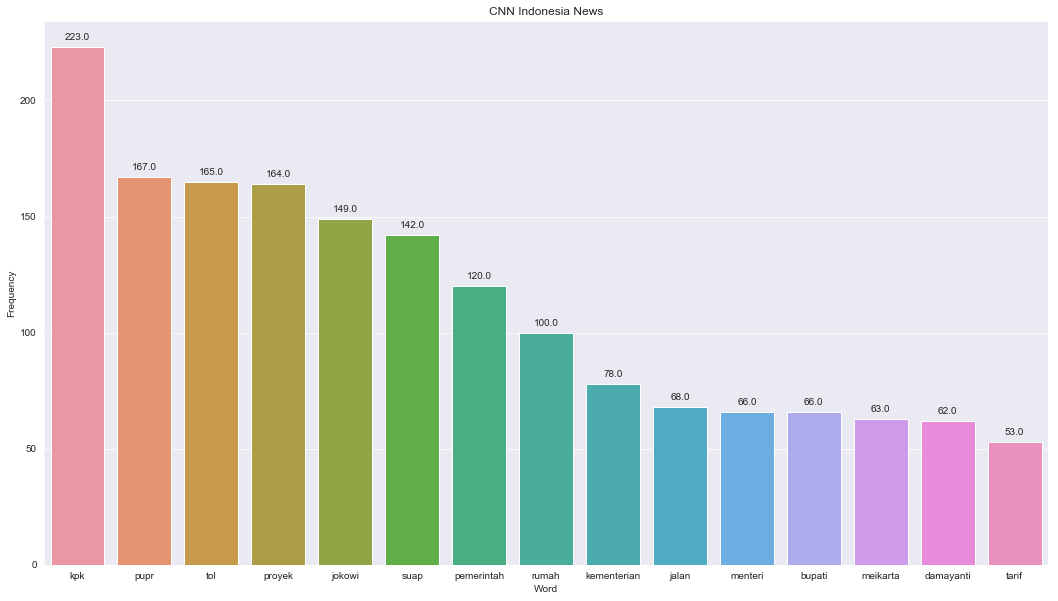

In [23]:
plt.figure(figsize=(18,10))
sns.set_style('darkgrid')
plt.title('CNN Indonesia News')

ax = sns.barplot(x = 'Word', y = 'Frequency', data = rslt_tags.head(15))


rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)

In [2]:
train = pd.read_csv('CNNnews.csv')

In [29]:
bloblist_desc = list()


In [30]:
from translate import Translator
translator= Translator(from_lang="id", to_lang="en")


In [31]:
train_descr_str=train['newstitle'].astype(str)
for row in train_descr_str:
    an = translator.translate(row)
    blob = TextBlob(an)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    train_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])


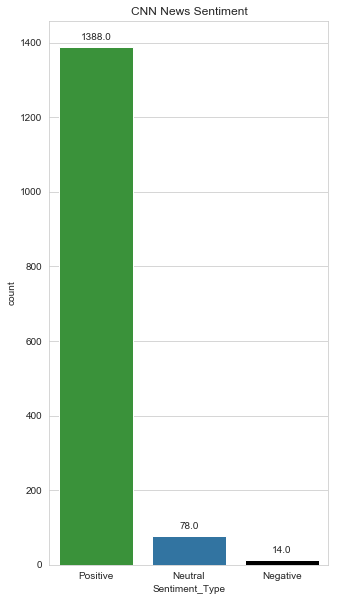

In [40]:
 
def f(train_polarity_desc):
    if train_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif train_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

train_polarity_desc['Sentiment_Type'] = train_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(5,10))
sns.set_style("whitegrid")
plt.title('CNN News Sentiment')
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc, palette=["C2", "C0", "k"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va=va)


In [36]:
train_polarity_desc

,sentence,sentiment,polarity,Sentiment_Type
0,Polisi Usulkan Ada Jalur Khusus Motor di Tol,0.357143,0.571429,Positive
1,KPK Dalami Proyek yang Jadi 'Keran' Duit Buat ...,0.000000,0.000000,Neutral
2,TNI Gelar Operasi Psikologi di Papua Cegah Fob...,0.000000,0.100000,Neutral
3,Jokowi: Kondisi SMPN 1 Muara Gembong Bekasi Sa...,0.180000,0.420000,Positive
4,"Kasus Jual-Beli Jabatan, KPK Periksa Bupati Ci...",0.000000,0.000000,Neutral
5,"Kena Patil Udang, Tangan Jokowi Berdarah saat ...",-0.800000,0.900000,Negative
6,PUPR Gagal Capai Tiga Target RPJMN,-0.500000,0.300000,Negative
7,"Kasus Suap Bupati Mesuji, KPK Geledah 5 Lokasi",0.000000,0.000000,Neutral
8,Menteri Basuki Sebut Motor Masuk Tol Boleh Sec...,0.000000,0.000000,Neutral
9,"Kasus Suap Proyek Jalan, KPK Kirim Direktur MT...",0.000000,0.000000,Neutral
